<a href="https://colab.research.google.com/github/fredydo/Mini-Proyecto1/blob/main/loadEmotionalDatabaseProy1_adelanto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cargar bases de datos de computación afectiva


La base de datos [DEAP](http://www.eecs.qmul.ac.uk/mmv/datasets/deap/index.html) es un conjunto de datos multimodal para el análisis de los estados afectivos humanos. El electroencefalograma (EEG) y las señales fisiológicas periféricas de 32 participantes se registraron mientras cada uno miraba 40 extractos de videos musicales de un minuto de duración. Los participantes calificaron cada video en términos de niveles de excitación (arousal), valencia, me gusta / no me gusta, dominio y familiaridad. Para 22 de los 32 participantes, también se grabó un video de cara frontal. Se utilizó un método novedoso para la selección de estímulos, utilizando la recuperación por etiquetas afectivas del sitio web last.fm, detección de videos destacados y una herramienta de evaluación en línea.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

ruta = '/content/drive/My Drive/'
fileName = 's17.mat'
db = sio.loadmat(ruta+fileName)
db

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Aug 21 08:32:38 2013',
 '__version__': '1.0',
 'data': array([[[-4.74806162e+00,  1.25138383e+01, -2.42521931e+00, ...,
          -9.61267515e+00,  1.05404439e+01,  3.97091891e+01],
         [-5.23313973e+00,  1.14957796e+01, -7.74271761e+00, ...,
          -4.69191526e+01, -3.57270098e+01, -5.87687115e+00],
         [-4.74208077e+00,  1.20123950e+01, -2.66537787e+00, ...,
           1.28023839e+01,  3.40084793e+01,  6.55370632e+01],
         ...,
         [-6.15474196e+03, -6.17105443e+03, -6.25352303e+03, ...,
           1.28883803e+03,  2.73371158e+02,  1.11046336e+03],
         [-4.29735518e+03, -4.41307608e+03, -4.51854323e+03, ...,
           6.74837536e+03,  6.66732191e+03,  6.53744107e+03],
         [-6.53897870e-03, -6.53897870e-03, -6.53897870e-03, ...,
          -2.43535942e-01, -2.43535942e-01, -2.43535942e-01]],
 
        [[-1.25487623e+01, -1.16982806e+01, -1.57186565e+01, ...,
  

In [3]:
X = db['data']
X.shape

(40, 40, 6528)

### Dataset description

La base de datos se le removieron los 3 segundos iniciales de acondicionamiento. El arreglo X contiene todas las respuestas emocionales de las señales biológicas, para 40 videos diferentes. El arreglo se organiza de la forma

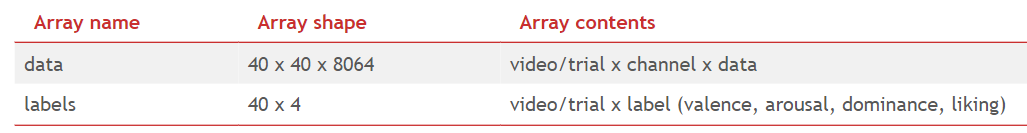

La siguiente tabla muestra el diseño de canales y el preprocesamiento realizado:

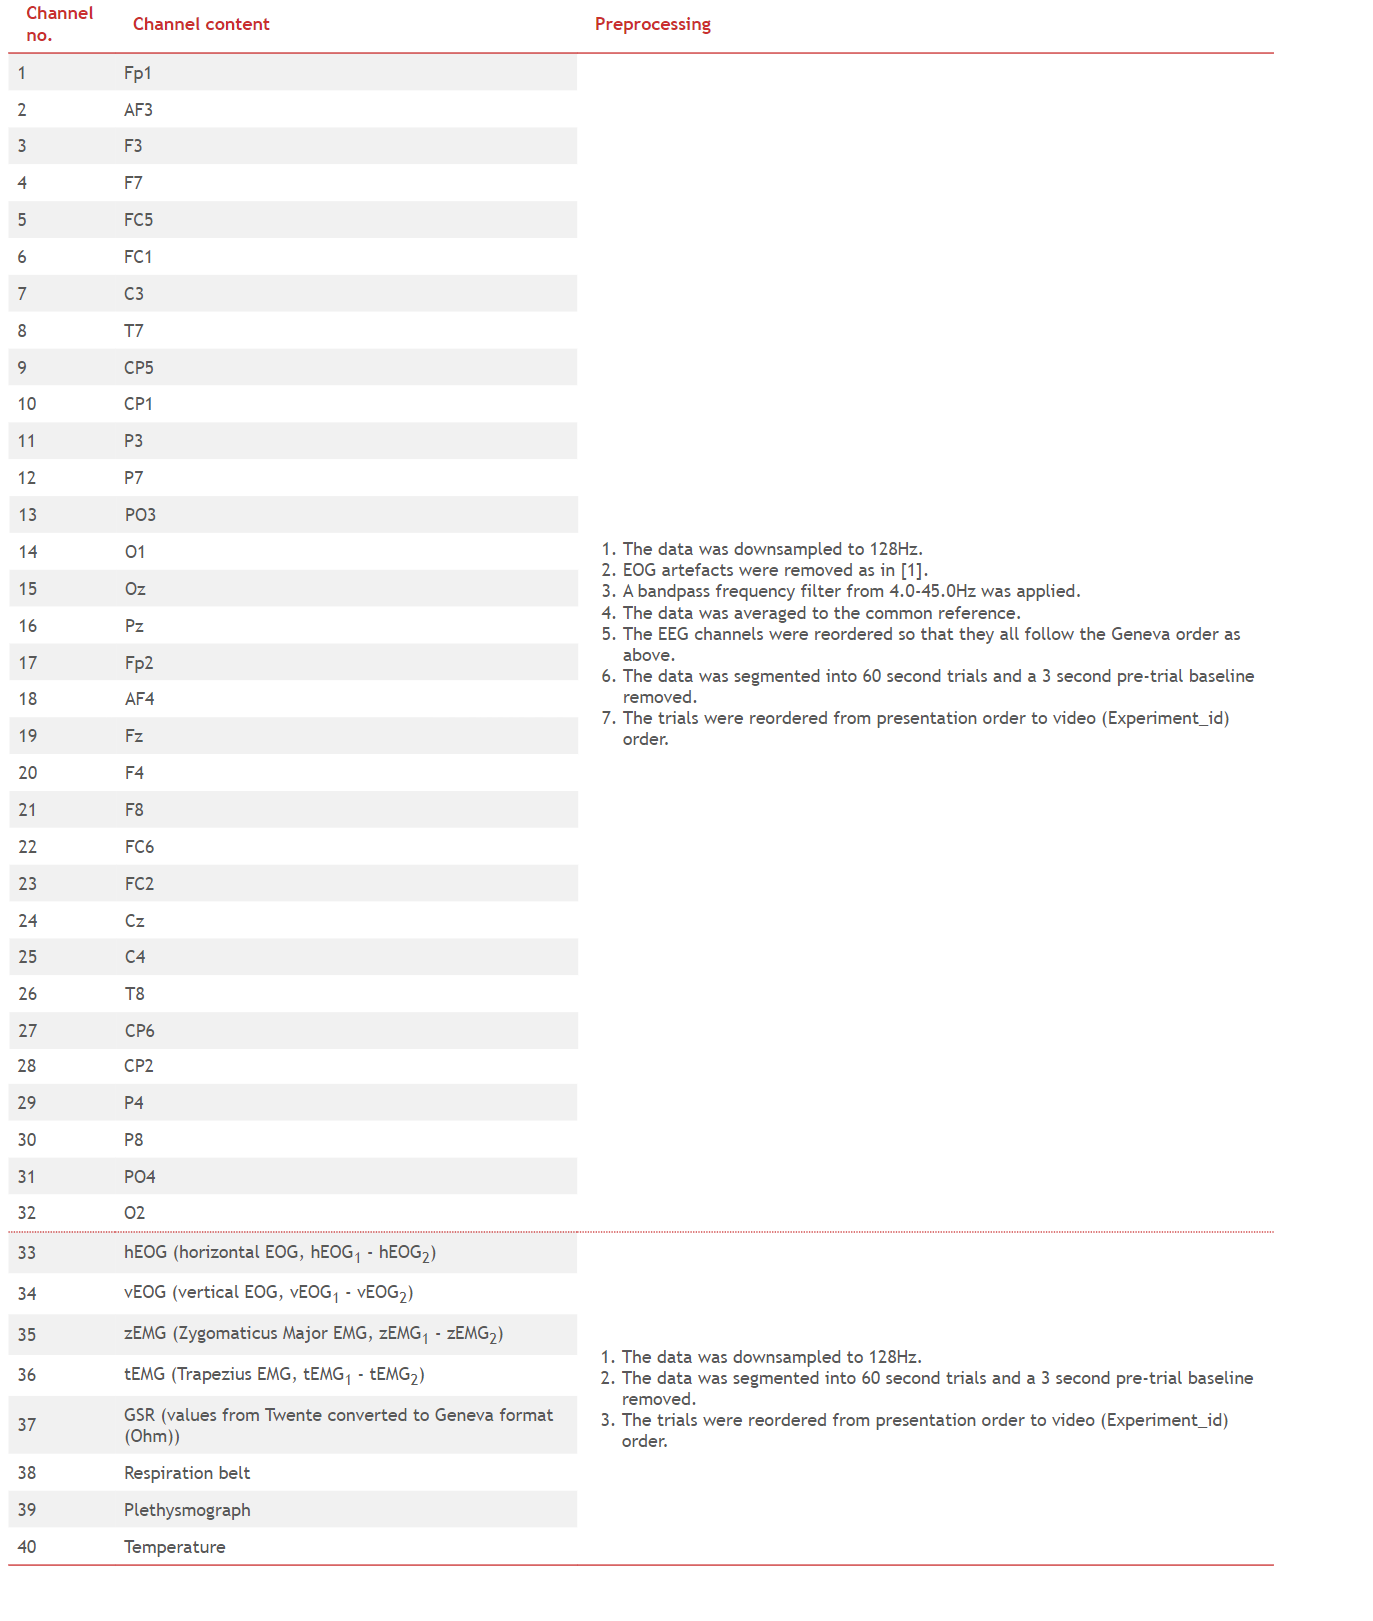

## Siglas señales fisiológicas

EEG: señales electroencefalográficas 
Generalmente son 32 canales 

EOG: electrooculograma (2 señales) movimientos verticales y horizontales

EMG: electromiogramas (2 señales) para los movimientos de los músculos (en la base de datos se capturó la señal del rostro).

Respiration belt:  banda que mide la frecuencia respiratoria

Temperatura: Mide la temperatura de la piel

Plethimograph:  Un pletismógrafo es un instrumento para medir cambios de volumen dentro de un órgano o de todo el cuerpo (generalmente como resultado de fluctuaciones en la cantidad de sangre o aire que contiene). Nos sirve como medida de el rítmo cardiaco (HR)

## Gráfica de una señal emocional

Por ejemplo si queremos obtener la señal de **respiration belt (respiración)** de la base de datos para el video número 15 (i.e., por elegir alguno), debe acceder a los datos mediante:

(6528,)


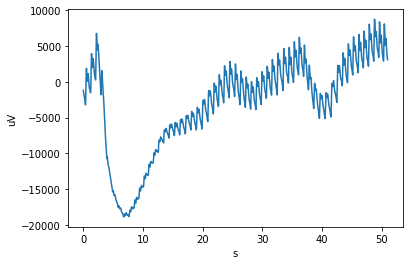

In [4]:
trial = 18 # video u observación 
channel = 39 # canal de la señal fisiológica
respiration = X[trial-1,channel-1,:]
print(respiration.shape)
ts = len(respiration)/128.
time = np.linspace(0,ts,len(respiration))

plt.plot(time,respiration)
plt.ylabel('uV')
plt.xlabel('s')
plt.show()

## Etiquetas emocionales

Cada una de las realizaciones induce una emoción en los sujetos. Por lo tanto cada realización (de las 40) tiene sus correspondientes etiquetas de la forma:

Los modelos dimensionales sugieren que la emoción se entiende mejor cuando ocurre dentro de un espacio dimensional, más comúnmente un espacio bidimensional que abarca la valencia y la excitación. La valencia emocional describe el grado en que una emoción es positiva o negativa, mientras que la excitación se refiere a su intensidad, es decir, la fuerza del estado emocional asociado.


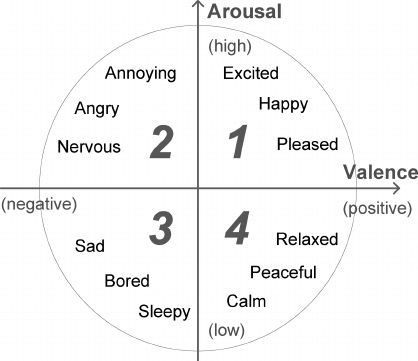

Las etiquetas están en el campo label:

labels	es una matriz de $40 \times 4$ en la cual se organiza de la forma	$video/trial \times label $ (valence, arousal, dominance, liking)

Valence	The valence rating (float between 1 and 9).
Arousal	The arousal rating (float between 1 and 9).
Dominance	The dominance rating (float between 1 and 9).
Liking	The liking rating (float between 1 and 9).


In [5]:
labels = db['labels']
print(labels)

[[4.05 5.96 5.01 5.04]
 [7.26 7.03 5.28 7.31]
 [6.46 5.78 5.04 6.04]
 [6.35 5.56 5.74 4.04]
 [7.05 8.15 6.12 7.35]
 [6.9  5.95 5.37 7.14]
 [7.08 6.6  5.87 8.13]
 [6.05 4.99 5.   6.03]
 [6.04 6.13 5.1  6.24]
 [6.09 7.05 5.54 6.06]
 [6.03 5.67 5.86 6.1 ]
 [5.96 3.68 5.59 4.96]
 [4.54 5.51 5.08 6.47]
 [6.58 5.85 5.59 7.32]
 [5.96 4.06 5.04 5.99]
 [5.92 3.62 5.6  6.28]
 [4.12 2.5  5.04 3.83]
 [6.22 3.83 5.49 7.69]
 [7.27 6.03 5.04 6.1 ]
 [7.03 3.88 5.87 6.27]
 [4.   4.09 5.24 4.21]
 [3.19 3.82 5.72 5.69]
 [3.62 2.95 5.04 2.92]
 [4.53 4.27 4.5  6.06]
 [6.18 4.   5.04 6.47]
 [3.73 2.77 5.81 3.73]
 [3.96 3.29 5.04 2.62]
 [5.64 3.78 5.77 6.04]
 [5.54 5.   5.47 5.9 ]
 [3.04 5.81 4.59 6.08]
 [4.54 5.69 4.23 5.63]
 [4.04 5.86 5.08 3.94]
 [3.83 5.74 5.55 2.86]
 [4.99 6.38 4.82 2.88]
 [4.17 5.74 5.46 2.35]
 [3.37 6.12 5.31 2.15]
 [3.46 7.03 5.86 1.  ]
 [3.6  6.23 5.81 2.4 ]
 [7.1  7.03 5.95 4.01]
 [5.04 6.03 5.05 5.72]]


## Generemos una gráfica del espacio emocional Arousal-Valence

Valencia Baja - Media y Alta

[1-3,4-6,7-9]

Arousal Baja - Media y Alta

[1-3,4-6,7-9]

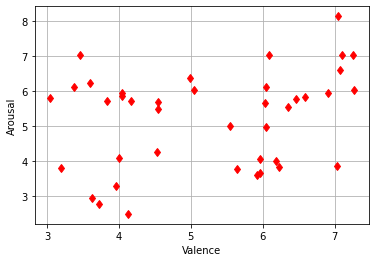

In [6]:
Valence = labels[:,0]
Arousal = labels[:,1]

plt.plot(Valence,Arousal,'dr')
plt.grid()
plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.show()

In [72]:
import scipy.signal 

X = db['data']


def feat(X):
  """
      Función que recibe una señal, calcula las características y retorna un vector de 1xD  
  """
  """
      Extradted features GSR
  """
  L=[]
  GSR=X[36]
  # mean
  L.append(np.mean(GSR))
  # Average of the first derivate
  diff=np.diff(GSR)
  L.append(np.mean(diff))
  # Average of derivative for negative values only
  aux=[]
  for i in diff:
    if i < 0 :
      aux.append(i)
  L.append(np.mean(aux))
  # Proportion of negative samples in the derivative vs. all samples,
  L.append(len(aux)/len(diff))

  """
      Extradted features Blood volume pressure
  """
  Blood=X[38]
  # Average
  L.append(np.mean(Blood))
  # STD
  L.append(np.std(Blood))
  # Spectral power in the band 0.2 Hz
  b,a = scipy.signal.butter(4,0.2/(128*0.5),btype="lowpass", analog=False)
  signal_filter = scipy.signal.lfilter(b,a,Blood)
  f, PSD = scipy.signal.welch(signal_filter, 128, nperseg=64)
  L.append(np.sum(PSD))
  # Spectral power in the band 0.3 Hz
  b,a = scipy.signal.butter(4,0.3/(128*0.5),btype="lowpass", analog=False)
  signal_filter = scipy.signal.lfilter(b,a,Blood)
  f, PSD = scipy.signal.welch(signal_filter, 128, nperseg=64)
  L.append(np.sum(PSD))
  # Spectral power in the band 0.4 Hz
  b,a = scipy.signal.butter(4,0.4/(128*0.5),btype="lowpass", analog=False)
  signal_filter = scipy.signal.lfilter(b,a,Blood)
  f, PSD = scipy.signal.welch(signal_filter, 128, nperseg=64)
  L.append(np.sum(PSD))

  """
      Extradted features Respiration pattern
  """
  Respiration=X[37]
  # Average
  L.append(np.mean(Respiration))
  # Mean derivate
  L.append(np.mean(np.diff(Respiration)))
  # STD
  L.append(np.std(Respiration))
  # band energy ratio
  b,a = scipy.signal.butter(4,0.25/(128*0.5),btype="lowpass", analog=False)
  signal_filter_low = scipy.signal.lfilter(b,a,Respiration)
  f, PSD = scipy.signal.welch(signal_filter_low, 128, nperseg=64)
  pot_low=20*np.log(np.sum(PSD))
  b,a = scipy.signal.butter(4,25/(128*0.5),btype="lowpass", analog=False)
  signal_filter_high = scipy.signal.lfilter(b,a,Respiration)
  f, PSD = scipy.signal.welch(signal_filter_high, 128, nperseg=64)
  pot_high=20*np.log(np.sum(PSD))
  L.append(pot_low-pot_high)

  """
      Extradted features Skin temperature
  """
  Skin=X[39]
  # Average
  L.append(np.mean(Skin))
  # Mean derivate
  L.append(np.mean(np.diff(Skin)))
  # Spectral power in the band 0.1 Hz
  b,a = scipy.signal.butter(4,0.1/(128*0.5),btype="lowpass", analog=False)
  signal_filter = scipy.signal.lfilter(b,a,Skin)
  f, PSD = scipy.signal.welch(signal_filter, 128, nperseg=64)
  L.append(np.sum(PSD))
  # Spectral power in the band 0.2 Hz
  b,a = scipy.signal.butter(4,0.2/(128*0.5),btype="lowpass", analog=False)
  signal_filter = scipy.signal.lfilter(b,a,Skin)
  f, PSD = scipy.signal.welch(signal_filter, 128, nperseg=64)
  L.append(np.sum(PSD))

  """
      Extradted features EMG and EOG
  """
  for i in range(32,36):
    # Average
    L.append(np.mean(X[i]))
    # Variance
    L.append(np.var(X[i]))
    # Energy
    L.append(np.sum(np.square(X[i])))
  
  L=np.array(L)
  return L

for i in X:
  print(feat(i))

[-6.74159527e+02 -2.62750438e-01 -1.50120074e+01  1.57346407e-01
 -1.66832441e+03  1.11837494e+04  2.26253682e+04  2.33240501e+04
  2.38804822e+04 -8.19100078e+02  1.11310025e+00  4.06689224e+03
 -9.81268377e+01 -9.47736016e-02 -3.63102440e-05  8.21454924e-08
  1.06192031e-07 -1.07962481e+02  1.01231151e+04  1.42173392e+08
  6.75374102e+02  1.29955941e+05  3.82597018e+09 -3.16474441e+02
  1.73287066e+04  7.66940634e+08  1.86519957e+02  1.27827281e+04
  3.10552775e+08]
[ 1.73583610e+03  3.39940058e-01 -9.98645247e+00  1.38041979e-01
  4.93472329e+03  3.22436938e+03  1.56755231e+03  1.94361308e+03
  2.70040374e+03 -5.68680906e+03 -8.97778715e-01  3.52299926e+03
 -9.40897718e+01  1.94226065e-01  5.37759310e-05  1.25760604e-07
  1.34896454e-07  1.87094366e+02  1.06440523e+04  2.97992457e+08
 -7.85260431e+02  2.50853556e+05  5.66295840e+09 -4.11548910e+01
  4.02092514e+02  1.36814971e+07 -3.49269733e+02  1.84925648e+04
  9.17065917e+08]
[ 6.34981281e+03  1.37172903e+00 -2.24785661e+01  9.52

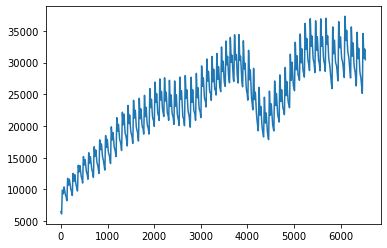

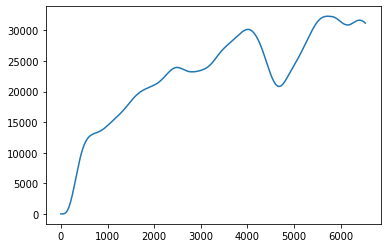

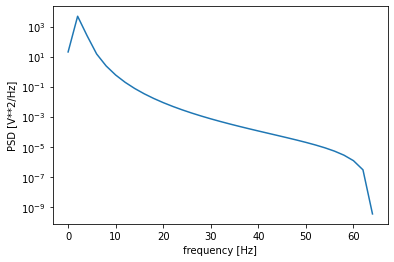

5170.485494451372


In [53]:
i=X[30][38]

b,a = scipy.signal.butter(4,0.2/(128*0.5),btype="lowpass", analog=False)
buffer = scipy.signal.lfilter(b,a,i)

plt.plot(i)
plt.show()
plt.plot(buffer)
plt.show()

f, PSD = scipy.signal.welch(buffer, 128, nperseg=64)
plt.semilogy(f, PSD)
#plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

print(np.sum(PSD))
